In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

## Importamos los datos necesarios y motramos los ultimos datos de las 16 comunas

In [249]:
url          = "https://raw.githubusercontent.com/elaval/covid_chile_regional/master/coronavirus_data_chile_regions.tsv"
data         = pd.read_csv(url, sep='\t')
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.tail(16)

,date,location,new_cases,total_cases,new_deaths,total_deaths
640,2020-04-12,Arica y Parinacota,8,115,1,1
641,2020-04-12,Tarapacá,8,46,0,0
642,2020-04-12,Antofagasta,21,138,0,1
643,2020-04-12,Atacama,0,13,0,0
644,2020-04-12,Coquimbo,2,66,0,0
645,2020-04-12,Valparaíso,6,254,0,2
646,2020-04-12,Metropolitana,151,3599,3,35
647,2020-04-12,O'Higgins,1,46,0,0
648,2020-04-12,Maule,4,138,0,3
649,2020-04-12,Ñuble,7,613,1,7


## Total de casos contagiados

In [250]:
total_casos_chile   = data['new_cases'].sum()
total_casos_chile

7212

## Total de casos por región

In [251]:
suma_total_casos_region = data.groupby(['location'])['new_cases'].sum()
suma_total_casos_region

location
Antofagasta            138
Araucanía              775
Arica y Parinacota     115
Atacama                 13
Aysén                    7
Biobío                 500
Coquimbo                66
Los Lagos              372
Los Ríos               135
Magallanes             396
Maule                  138
Metropolitana         3598
O'Higgins               46
Tarapacá                46
Valparaíso             254
Ñuble                  613
Name: new_cases, dtype: int64

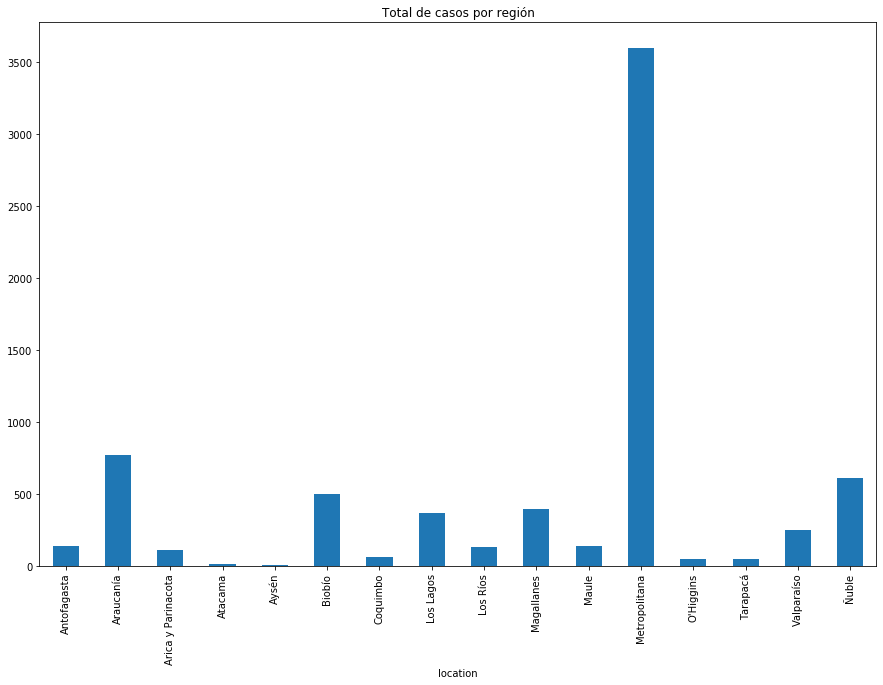

In [252]:
suma_total_casos_region.plot(kind='bar', title = 'Total de casos por región')

##  Avances Coronavirus Por Fecha

In [253]:
avance_por_fecha_chile = data.groupby(['date'])['total_cases'].sum()
avance_por_fecha_chile

date
2020-03-03       1
2020-03-04       2
2020-03-05       4
2020-03-06       5
2020-03-07       7
2020-03-08      10
2020-03-09      13
2020-03-10      17
2020-03-11      23
2020-03-12      33
2020-03-13      43
2020-03-14      61
2020-03-15      75
2020-03-16     156
2020-03-17     201
2020-03-18     238
2020-03-19     342
2020-03-20     434
2020-03-21     537
2020-03-22     632
2020-03-23     746
2020-03-24     922
2020-03-25    1142
2020-03-26    1306
2020-03-27    1610
2020-03-28    1909
2020-03-29    2139
2020-03-30    2449
2020-03-31    2738
2020-04-01    3031
2020-04-02    3404
2020-04-03    3737
2020-04-04    4161
2020-04-05    4471
2020-04-06    4815
2020-04-07    5116
2020-04-08    5546
2020-04-09    5972
2020-04-10    6501
2020-04-11    6927
2020-04-12    7213
Name: total_cases, dtype: int64

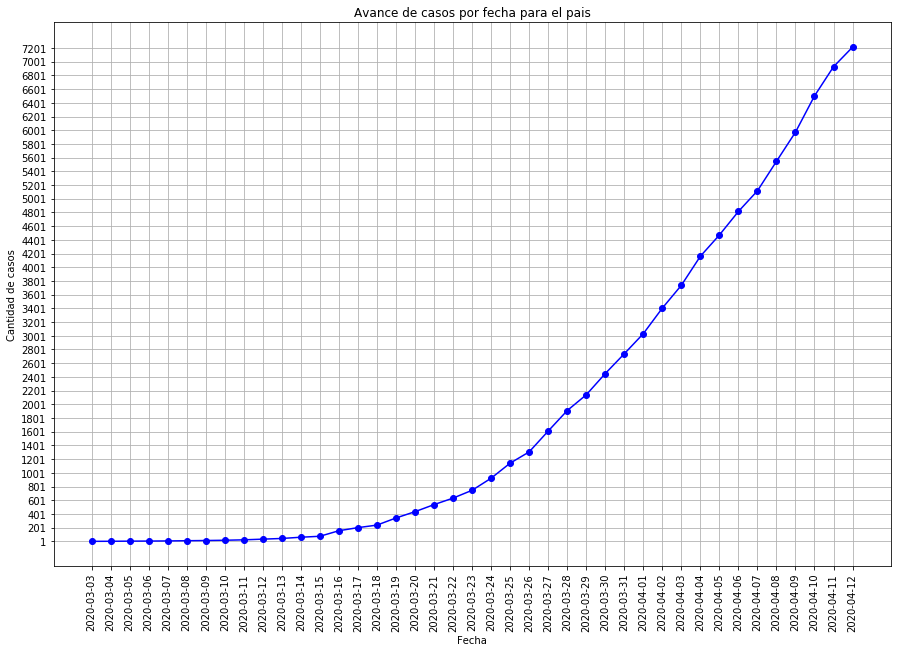

In [254]:
df_avance_por_fecha_chile =  avance_por_fecha_chile.to_frame().reset_index()
X                         =  df_avance_por_fecha_chile["date"]
Y                         =  df_avance_por_fecha_chile["total_cases"]

plt.plot(X,Y, "bo")
plt.plot(X,Y, 'b')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.title("Avance de casos por fecha para el pais")
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(min(Y), max(Y)+1, 200))
plt.grid()
plt.show()


## Avance fecha por región 

In [255]:
avance_por_fecha_region         = data.groupby(['date', 'location'], as_index=False)['total_cases'].sum()

In [256]:
def getGraphandList(name_region, scale):
    region           = avance_por_fecha_region.loc[avance_por_fecha_region['location'] == name_region]
    
    plt.plot(region["date"],region["total_cases"], "bo")
    plt.plot(region["date"],region["total_cases"], 'b')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de casos')
    plt.title("Curva de crecimiento - " + str(name_region))
    plt.xticks(region["date"].values, rotation='vertical')
    plt.yticks(np.arange(min(region["total_cases"].values), max(region["total_cases"].values)+1, scale))
    plt.grid()
    plt.show()

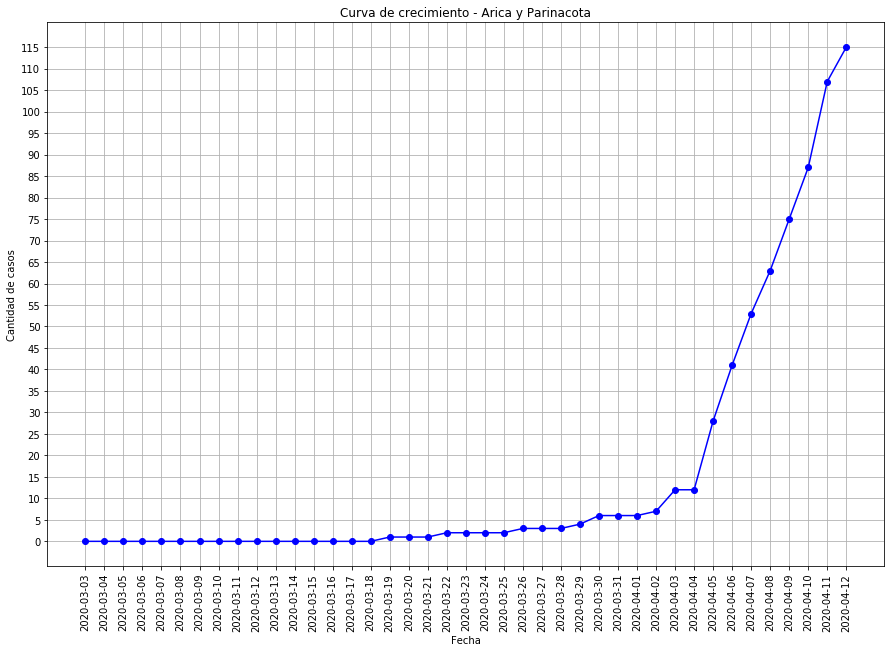

In [257]:
getGraphandList("Arica y Parinacota", 5)

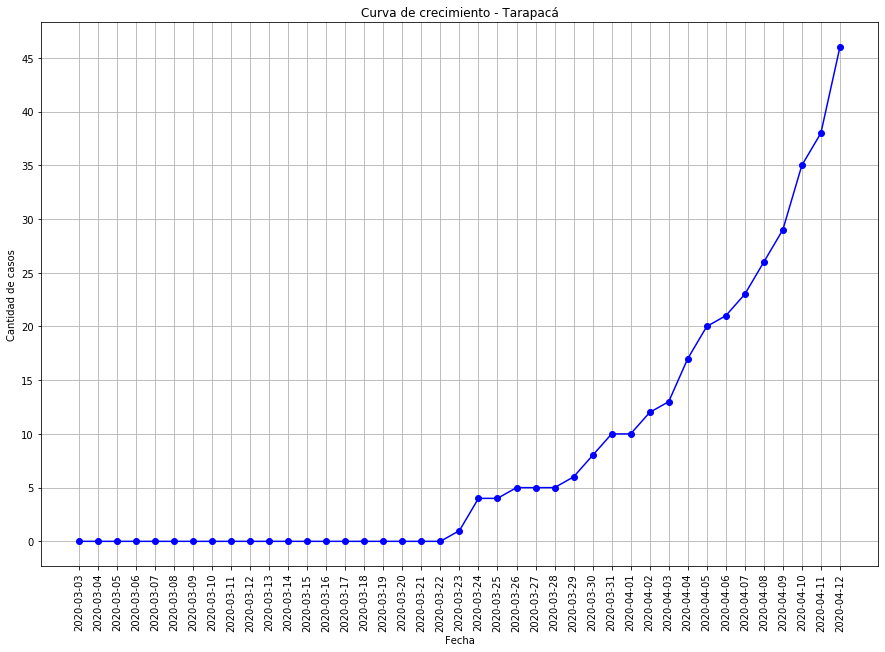

In [258]:
getGraphandList("Tarapacá", 5)

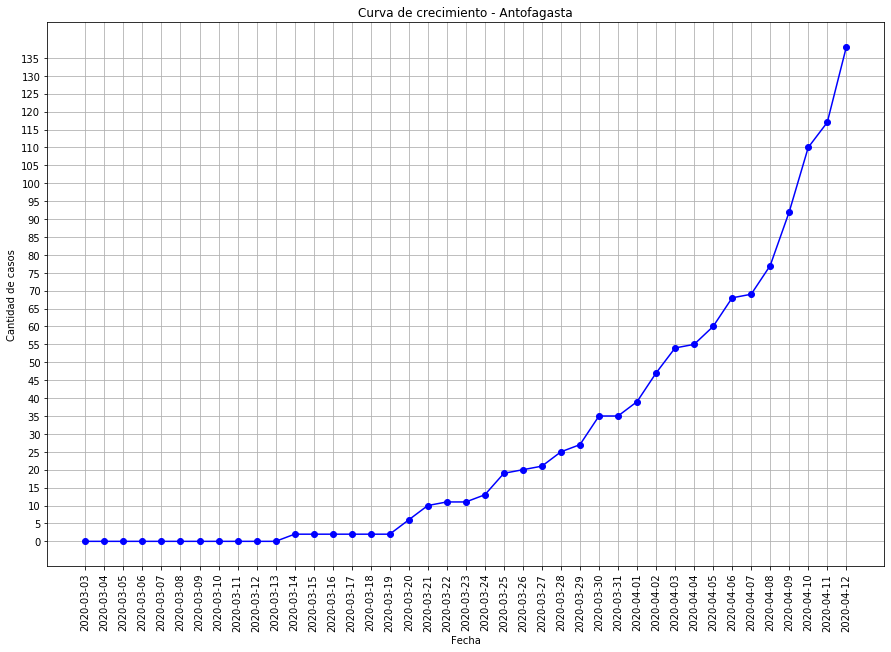

In [259]:
getGraphandList("Antofagasta", 5)

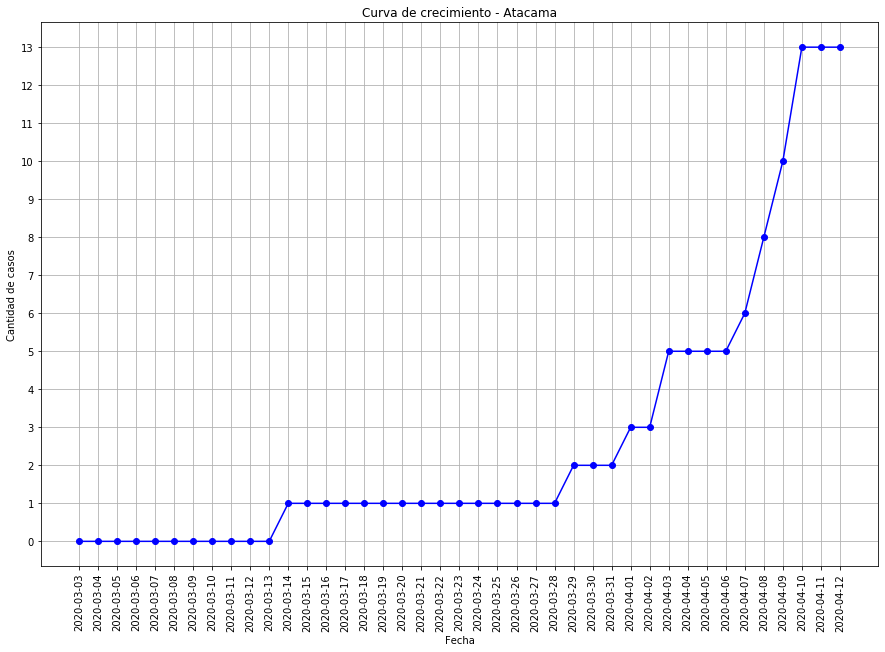

In [260]:
getGraphandList("Atacama", 1)

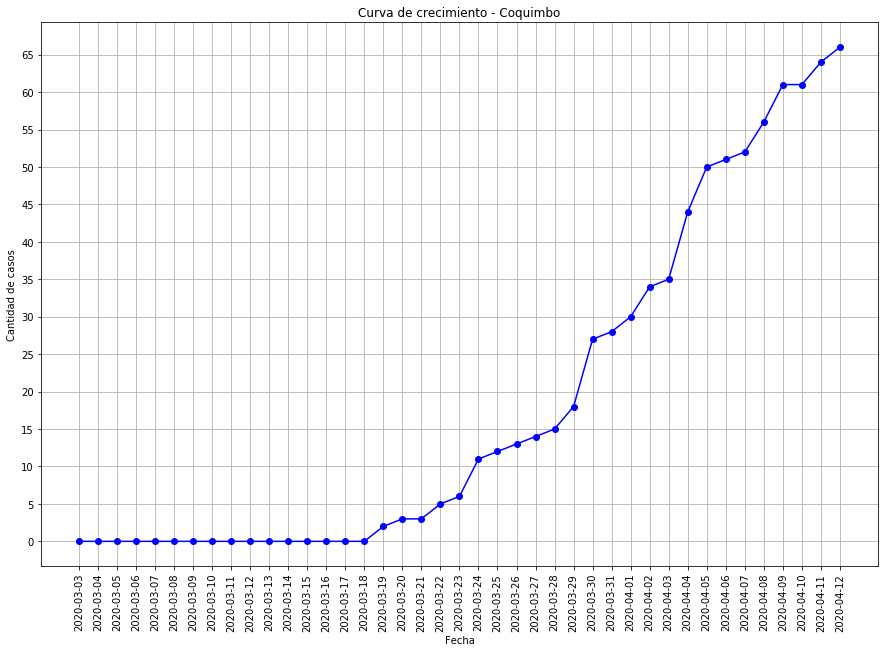

In [261]:
getGraphandList("Coquimbo", 5)

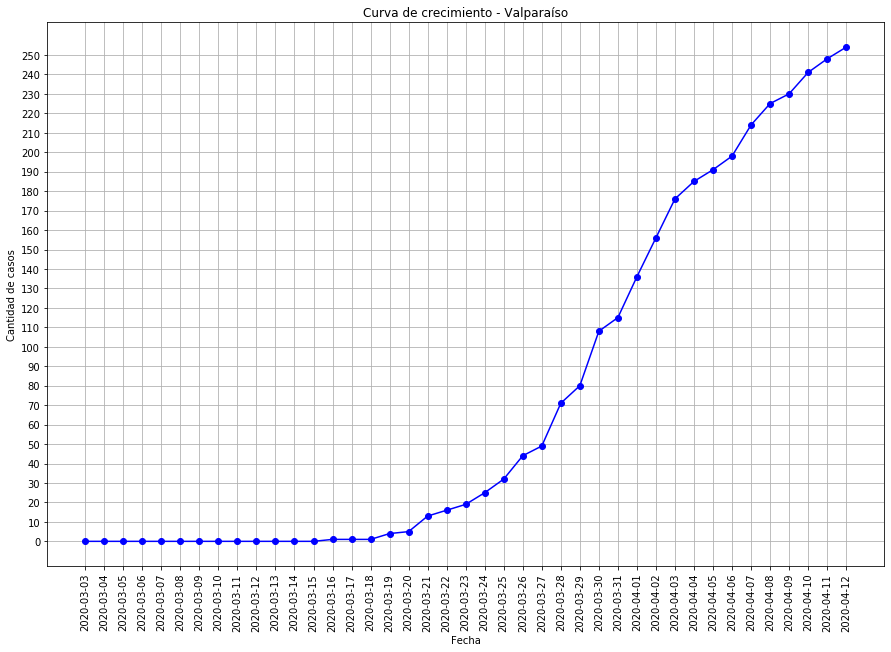

In [262]:
getGraphandList("Valparaíso", 10)

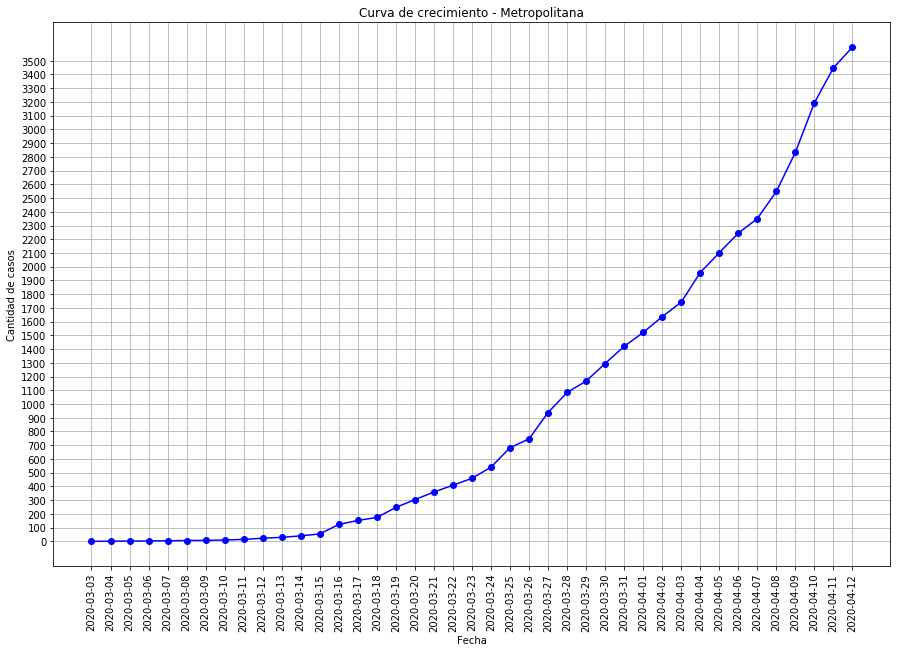

In [263]:
getGraphandList("Metropolitana", 100)

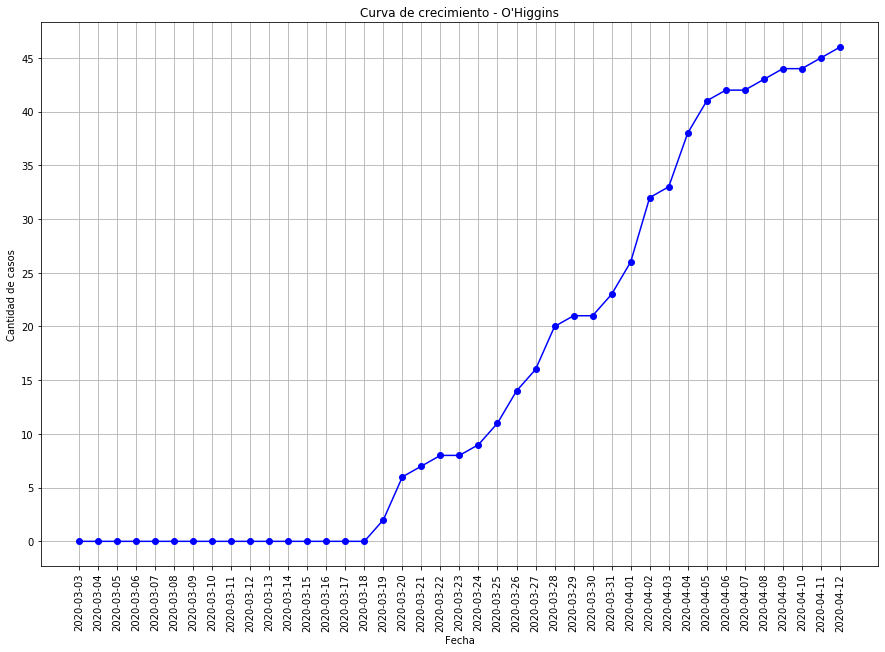

In [264]:
getGraphandList("O'Higgins", 5)

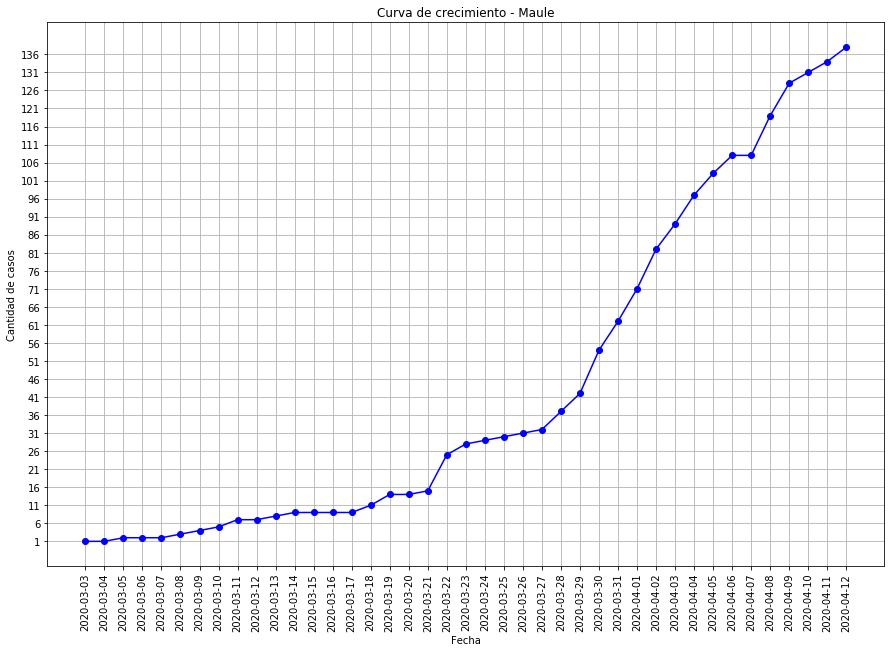

In [265]:
getGraphandList("Maule", 5)

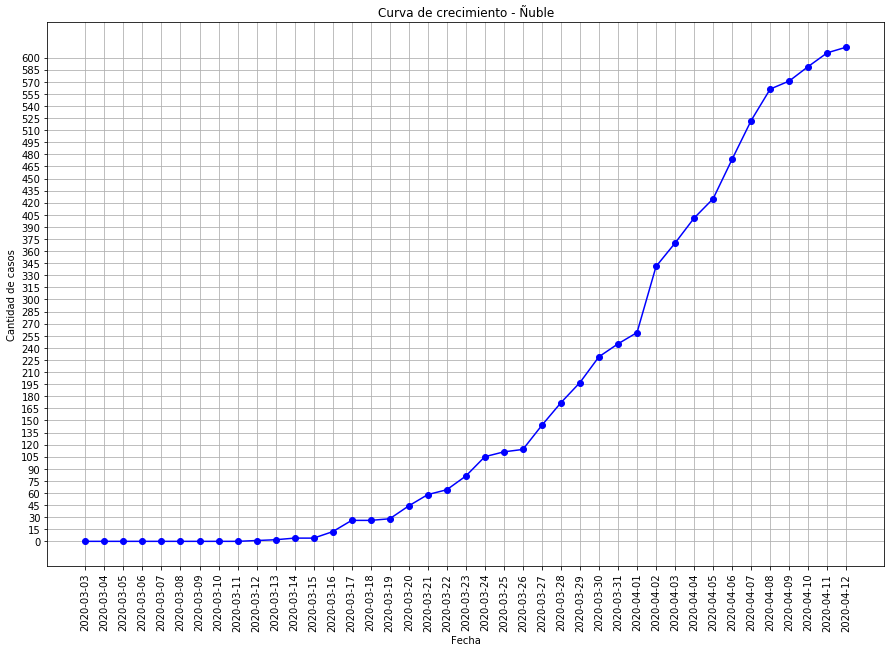

In [266]:
getGraphandList("Ñuble", 15)

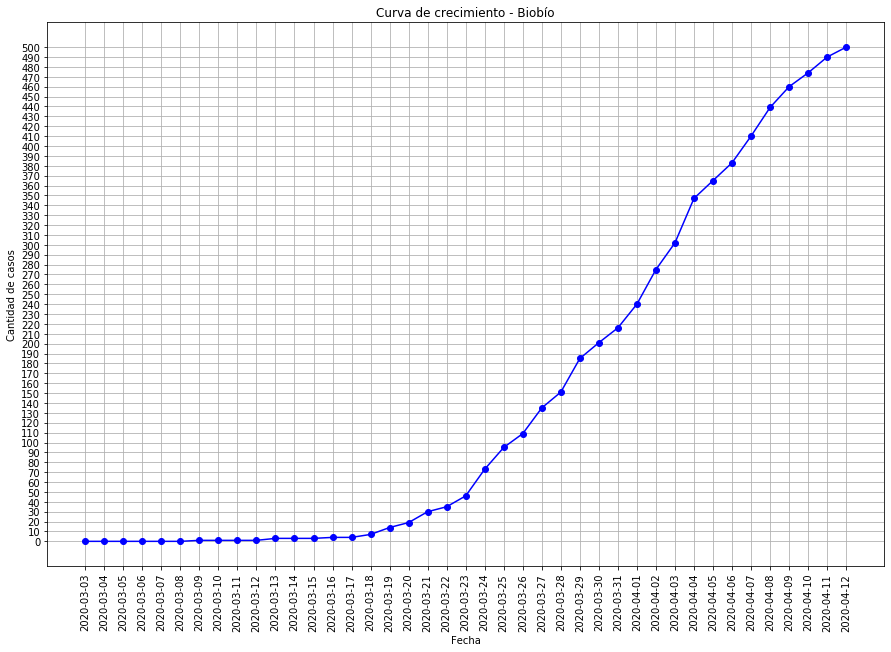

In [267]:
getGraphandList("Biobío", 10)

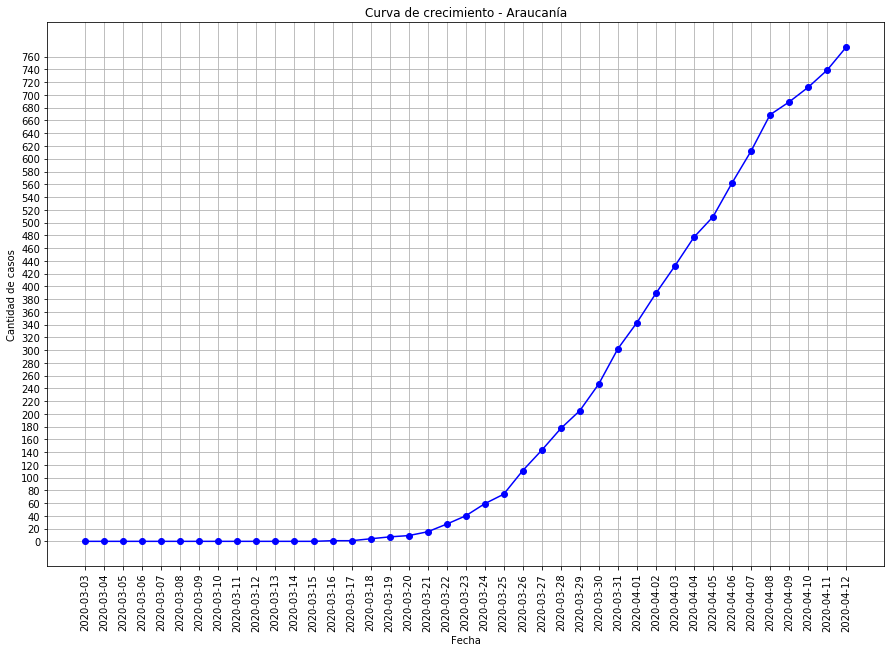

In [268]:
getGraphandList("Araucanía", 20)

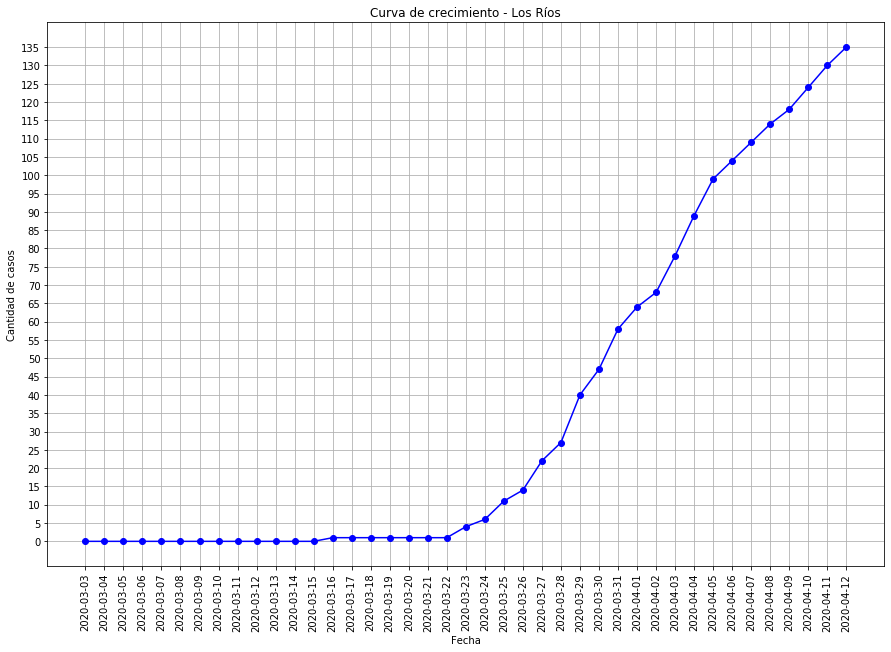

In [269]:
getGraphandList("Los Ríos", 5)

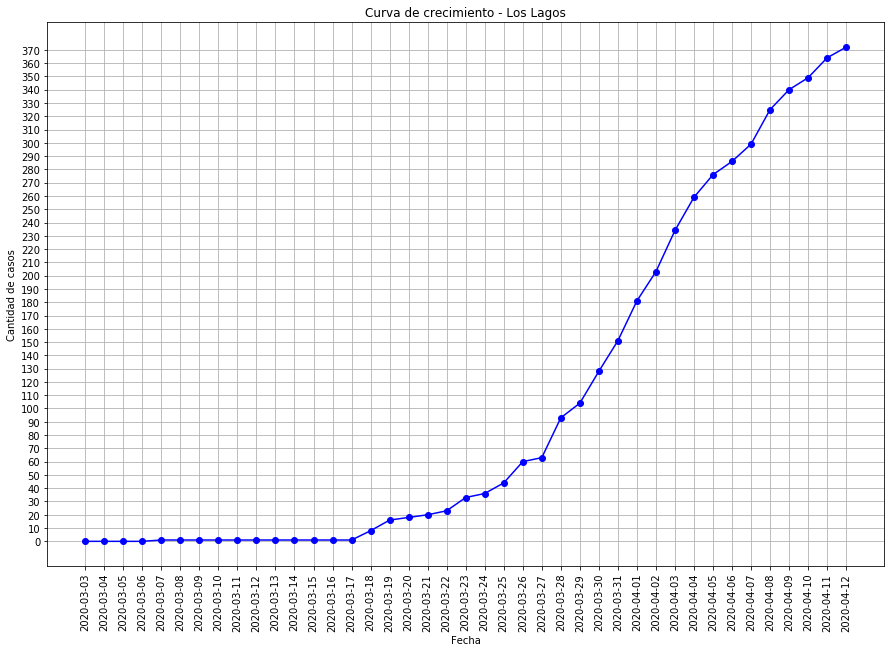

In [270]:
getGraphandList("Los Lagos", 10)

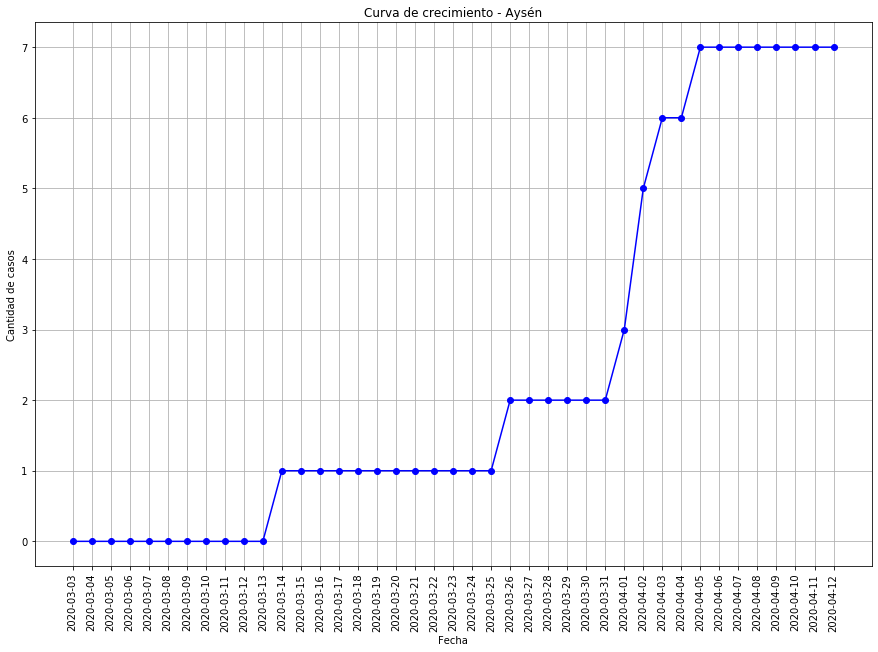

In [271]:
getGraphandList("Aysén", 1)

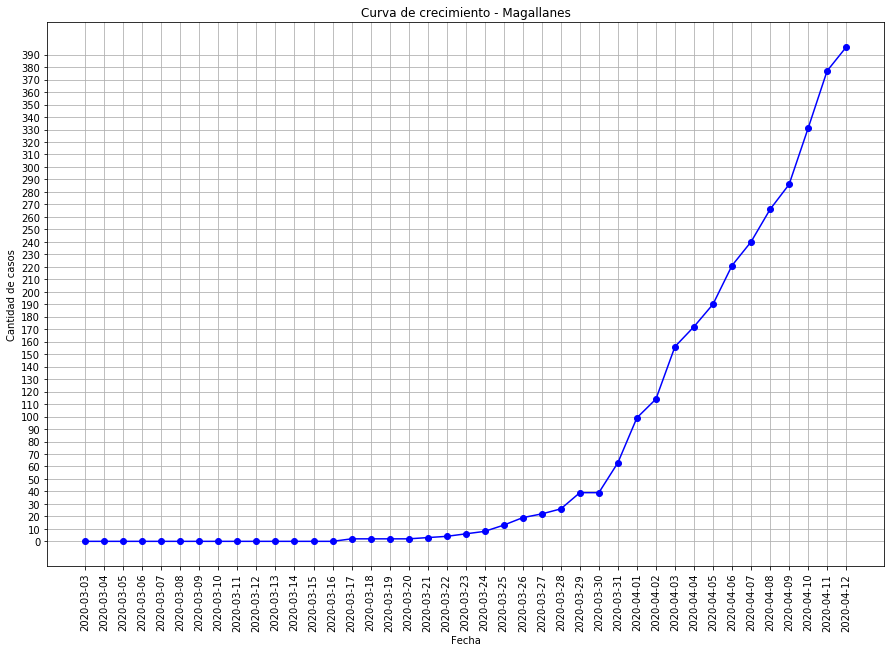

In [272]:
getGraphandList("Magallanes", 10)

In [77]:
colors = ['#f15656', '#f18e56', '#f1c956', '#bdf156', '#74f367', '#67f3b3', '#67e6f3', '#67a9f3', '#6772f3', '#9167f3', '#de67f3', '#f367c9', '#f36789', '#1c306a', "#1c6a20", "#2c6a40"]
def getGraphandListall():
    icolor = 0
    name_regiones = avance_por_fecha_region["location"].unique()
    
    for nregion in name_regiones:
        region           = avance_por_fecha_region.loc[avance_por_fecha_region['location'] == nregion]
        color            = colors[icolor]
        plt.plot(region["date"],region["total_cases"], color)
        icolor += 1
        
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de casos')
    plt.title('Curva de crecimiento por región')
    plt.legend(name_regiones, loc = 'best', bbox_to_anchor=(1.0, 1.0))
    plt.show()

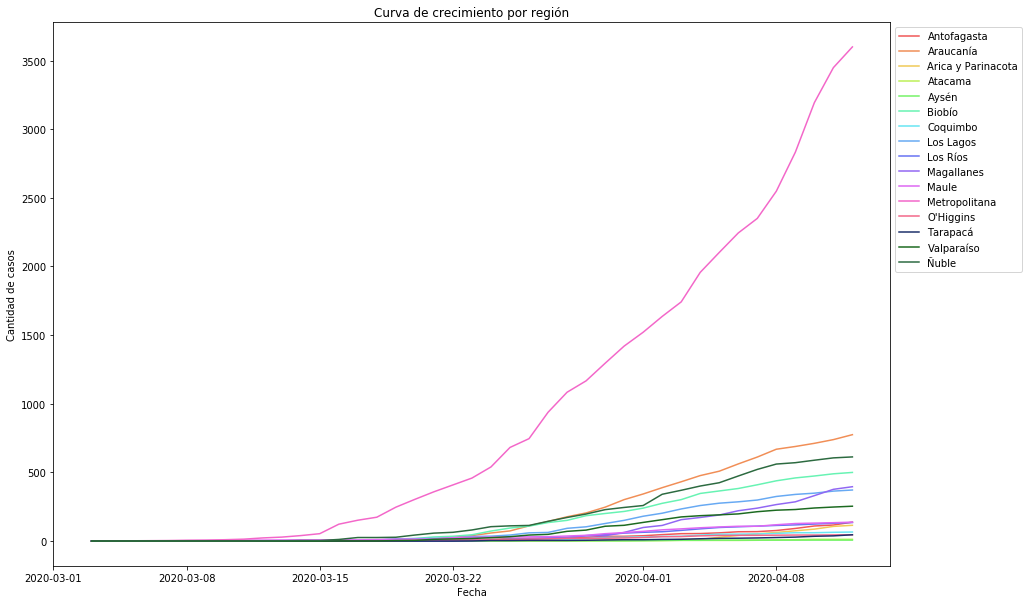

In [78]:
getGraphandListall()